# Devoir 1 &mdash; Algèbre linéaire et manipulation d'images sous Python
## Récupération des fichiers dans Colab

In [253]:
#
# Exécutez cette cellule pour préparer votre environnement Colab.
#
# %%capture
# !wget https://benhadid.github.io/m1vpo/static_files/assignments/hw0.zip
# !unzip hw0.zip
# !mv hw0/* .
# !rm -rf hw0
# !rm -rf hw0.zip

## Initialisation du bloc-notes

In [254]:
#Importe la fonction print_function à partir de version future de python
from __future__ import print_function

#Setup

# Le module random implémente un générateur de nombres pseudo-aléatoire
import random

# Numpy est le paquetage principal utilisé pour le calcul scientifique dans Python.
# Ce paquetage sera l'une de nos bibliothèques les plus utilisées dans ce cours
import numpy as np


#Importe toutes les méthodes dans les fichiers: linalg.py et imageManip.py
from linalg import *
from imageManip import *


#Matplotlib est une bibliothèque de traçage(dessin) pour python
import matplotlib.pyplot as plt
# Le code suivant fait apparaître les figure de matplotlib en ligne dans le
# notebook au lieu de lancer une nouvelle fenêtre.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # fixer les dimensions par défaut des figures
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Quelques instructions supplémentaires pour que le notebook recharge les modules externes en python;
# voir http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Description

Nous allons explorer dans ce devoir des notions de base d'algèbre linéaire et quelques techniques de manipulation d'images sous Python. Cela permettra de mettre tout le monde à la même page par rapport aux compétences requises pour ce module.

Par ailleurs, l'autre objectif de ce devoir est de vous initier/inciter à rechercher sur la toile les fonctionnalités python susceptible de vous aider à résoudre un problème donné. Ainsi, dans de nombreuses fonctions que vous implémenterez ici, vous devez identifier / utiliser les fonctions python qui peuvent vous assister.

## 2. Algèbre Linéaire
Dans cette section, nous allons revoir quelques notions d'algèbre linéaire et apprendre à manipuler des vecteurs et des matrices en python à l'aide de Numpy. À la fin de cette section, vous aurez implémenté toutes les méthodes requises dans le fichier `linalg.py`.

### Question 2.1
En premier lieu, définissez les matrices et vecteurs suivants à l'aide de Numpy. En ce sens, cherchez sur la toile la documentation sur `np.array()`. Dans le bloc de code suivant, définissez $M$ comme une matrice $(4, 3)$, $a$ comme un vecteur ligne $(1, 3)$ et $b$ comme un vecteur colonne $(3, 1)$ :

$$
M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12 \end{bmatrix}
, \qquad
a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
, \qquad
b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$

In [255]:
### VOTRE CODE ICI - DEBUT (remplacez l'instruction 'pass' par votre code)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
a = np.array([[1, 1, 0]])
b = np.array([[-1], [2], [5]])
### VOTRE CODE ICI - FIN
print("M = \n", M)
print("Dimension de M : ", M.shape)
print()
print("a = ", a)
print("Dimension de a : ", a.shape)
print()
print("b = ", b)
print("Dimension de b : ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Dimension de M :  (4, 3)

a =  [[1 1 0]]
Dimension de a :  (1, 3)

b =  [[-1]
 [ 2]
 [ 5]]
Dimension de b :  (3, 1)


### Question 2.2
Implementez la méthode `dot_product()` dans `linalg.py` et vérifiez qu'elle retourne une réponse corrècte pour le produit scalaire $\: b^T a^T$.

In [256]:
# Nous allons tester ici votre implémentation de dot_product(). La réponse corrècte est : [[1]].
aDotB = dot_product(a, b)
print(aDotB)

print("dimension : ", aDotB.shape)

[[1]]
dimension :  (1, 1)


### Question 2.3
Implémentez la méthode `complicated_matrix_function()` dans `linalg.py` et utilisez là pour calculer le produit $(b^T a^T) M a^T$

NOTE IMPORTANTE : La méthode `complicated_matrix_function()` s'attend à ce que toutes les entrées soient des tableaux Numpy bidimensionnels. Ceci est nécessaire car les tableaux Numpy 2D peuvent être transposés, tandis que les tableaux 1D (c.-à-d. les vecteurs) ne peuvent pas être transposés.

Pour transposer un tableau bidimensionnel `array`, vous pouvez utiliser la syntaxe `array.T`

In [257]:
# La réponse retournée doit être $[[3], [9], [15], [21]]$ de dimension (4, 1).
ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("dimension : ", ans.shape)

[[ 3]
 [ 9]
 [15]
 [21]]

dimension :  (4, 1)


In [258]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T

# La réponse retournée doit être $[[20], [100]]$ de dimension (2, 1).
ans = complicated_matrix_function(M_2, a_2, b_2)
print(ans)
print()
print("dimension : ", ans.shape)

[[ 20]
 [100]]

dimension :  (2, 1)


### Question 2.4
Implémentez les fonctions `svd()` et `get_singular_values()`. Dans `svd()`, vous devez effectuer une décomposition en valeurs singulières ([plus d'info](https://fr.wikipedia.org/wiki/D%C3%A9composition_en_valeurs_singuli%C3%A8res)) de la matrice fournie en entrée. La fonction `get_singular_values()` doit retourner les k plus grandes valeurs singulières (k est donné en paramètre lors d'appels de cette fonction).

In [259]:
# Renvoyons d'abord la première valeur singulière et affichons la. Elle doit être ~ 25.46.
only_first_singular_value = get_singular_values(M, 1)
print(only_first_singular_value)

# Maintenant, Récupérons les deux premières valeurs singulières.
# Notez que la première valeur singulière est beaucoup plus grande que la seconde.
first_two_singular_values = get_singular_values(M, 2)
print(first_two_singular_values)

# Assurons-nous que la première valeur singulière dans les deux appels est la même.
assert only_first_singular_value[0] == first_two_singular_values[0]

[25.46240744]
[25.46240744  1.29066168]


### Question 2.5
Implementez les méthodes `eigen_decomp()` et `get_eigen_values_and_vectors()`. Vous devez effectuer ici la décomposition en valeurs propres ([plus d'infos](https://fr.wikipedia.org/wiki/D%C3%A9composition_d%27une_matrice_en_%C3%A9l%C3%A9ments_propres)) de la matrice ci-dessous, puis retourner les k plus grandes valeurs propres et vecteurs propres associés.

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$


In [260]:
# Commençons par définir la matrice  M.
# Appuyez-vous sur votre réponse à la question 1.1 plus haut et remplacez 'pass'
# par une instruction corrècte
M = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
# Récupérons maintenant la première valeur propre et le premier vecteur propre.
# Votre résultat doit retourner une seule valeur propre et un seul vecteur propre.
val, vec = get_eigen_values_and_vectors(M, 1)
print("Première valeur propre = ", val)
print()
print("Premier vecteur propre = \n", vec)
print()
assert len(vec) == 1

# Maintenant, récupérons les deux premières valeurs propres et vecteurs propres.
# Votre résultat doit retourner une liste de deux valeurs propres et une liste de deux tableaux (deux vecteurs propres).
val, vec = get_eigen_values_and_vectors(M, 2)
print("Valeurs propres = ", val)
print()
print("Vecteurs propres = \n", vec)
assert len(vec) == 2

Première valeur propre =  [16.11684397]

Premier vecteur propre = 
 [[-0.23197069 -0.52532209 -0.8186735 ]]

Valeurs propres =  [16.11684397  1.11684397]

Vecteurs propres = 
 [[-0.23197069 -0.52532209 -0.8186735 ]
 [-0.78583024 -0.08675134  0.61232756]]


## 3. Manipulation d'images

Dans cette deuxième partie, commençons par charger en mémoire quelques images afin de réaliser des opérations matricielles dessus. A la fin de cette section, vous aurez implémenté toutes les fonctions dans le fichier `imageManip.py`

In [261]:
# Exécutez ce code pour définir les emplacements des images que nous utiliserons.
# Vous pouvez modifier ces chemins pour pointer vers vos propres images si vous voulez vous amuser.

image1_path = './image1.jpg'
image2_path = './image2.jpg'

# Définition d'une fonction locale pour
# l'affichage d'images dans ce notebook

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Question 3.1
Implémentez la méthode de chargement `load()` dans `imageManip.py`. Les images chargées seront utilisées dans le reste de ce notebook pour visualiser vos résultats.

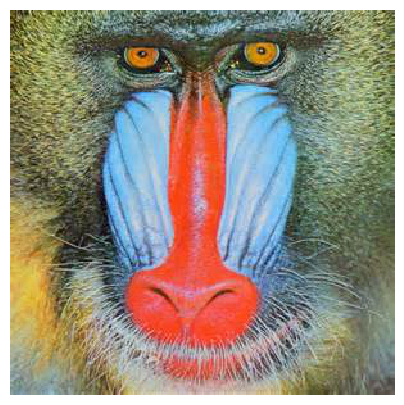

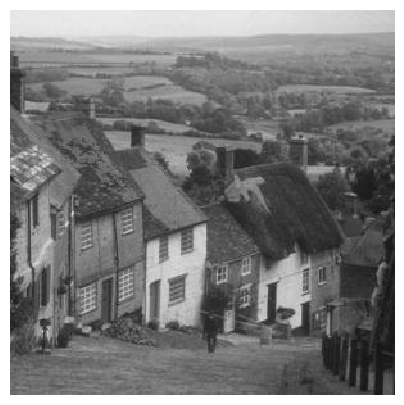

In [262]:
image1 = load(image1_path)
image2 = load(image2_path)

display(image1)
display(image2)

### Question 3.2
Implémentez la méthode `dim_image()` qui transforme une image fournie en entrée en utilisant la formule $x_n = 0.5 \times x_p^2$ pour chaque pixel, où $x_n$ est la nouvelle valeur et $x_p$ est la valeur initiale.

**Remarque :** Rappelons que les valeurs d'intensité d'une image en virgule flottante doivent être dans la plage $[0.0, 1.0]$. Ainsi, la formule ci-dessus réduira les valeurs de ces intensités et produira donc une image plus sombre.

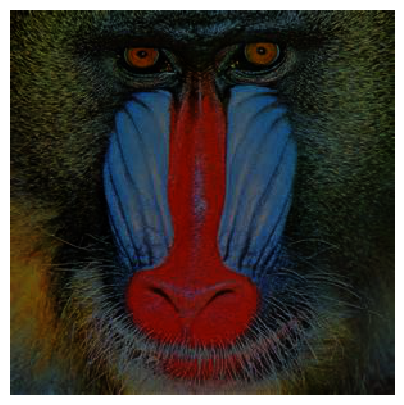

In [263]:
new_image = dim_image(image1)
display(new_image)

### Question 3.3
Implémentez la méthode `convert_to_grey_scale()` pour convertir une image en niveaux de gris (c.f. voir description de la fonction dans le fichier `imageManip.py` pour plus de détails).

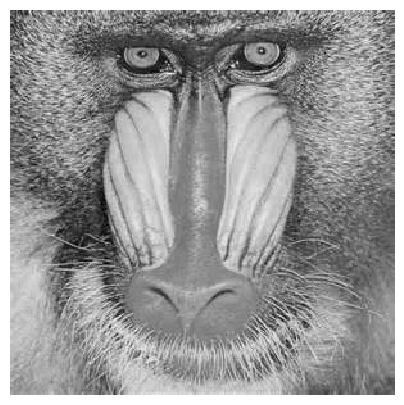

In [264]:
grey_image = convert_to_grey_scale(image1)
display(grey_image)

### Question 3.4

Implémentez la méthode `rgb_exclusion()` pour décomposer une image en ces trois canaux R (rouge), G (vert), B (bleu), puis retourner une nouvelle image en excluant le canal spécifié.

[[[0.         0.32156864 0.09019608]
  [0.         0.28235295 0.06666667]
  [0.         0.32941177 0.12941177]
  ...
  [0.         0.44313726 0.3137255 ]
  [0.         0.43137255 0.3019608 ]
  [0.         0.39215687 0.25490198]]

 [[0.         0.32156864 0.09019608]
  [0.         0.34117648 0.11764706]
  [0.         0.3647059  0.15686275]
  ...
  [0.         0.43137255 0.3019608 ]
  [0.         0.43137255 0.29411766]
  [0.         0.45490196 0.31764707]]

 [[0.         0.3764706  0.14509805]
  [0.         0.3647059  0.14117648]
  [0.         0.3019608  0.09411765]
  ...
  [0.         0.3647059  0.21960784]
  [0.         0.28235295 0.13725491]
  [0.         0.32156864 0.17254902]]

 ...

 [[0.         0.58431375 0.57254905]
  [0.         0.61960787 0.6117647 ]
  [0.         0.5882353  0.5882353 ]
  ...
  [0.         0.36862746 0.33333334]
  [0.         0.38039216 0.34509805]
  [0.         0.38039216 0.34509805]]

 [[0.         0.60784316 0.59607846]
  [0.         0.6392157  0.627451  ]


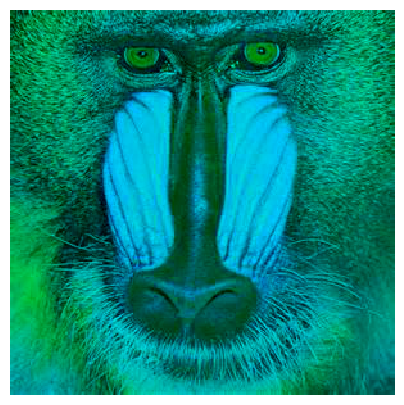

Ci-dessous, l'image n°1 où le canal vert a été supprimé.


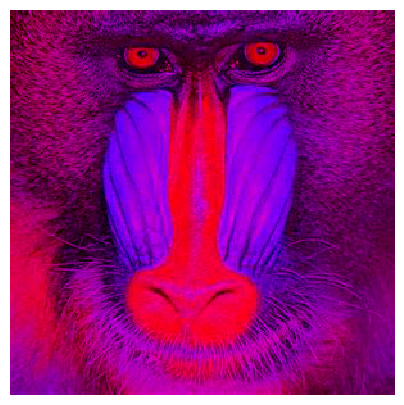

Ci-dessous, l'image n°1 où le canal bleu a été supprimé.


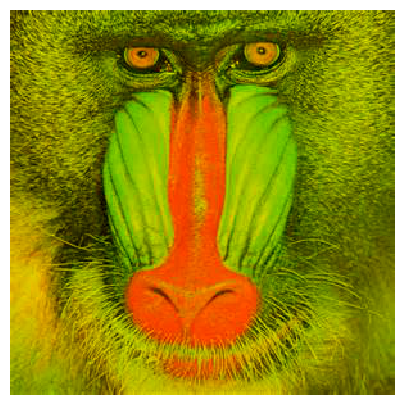

In [265]:
without_red = rgb_exclusion(image1, 'R')
without_blue = rgb_exclusion(image1, 'B')
without_green = rgb_exclusion(image1, 'G')

print("Ci-dessous, l'image n°1 où le canal rouge a été supprimé.")
display(without_red)

print("Ci-dessous, l'image n°1 où le canal vert a été supprimé.")
display(without_green)

print("Ci-dessous, l'image n°1 où le canal bleu a été supprimé.")
display(without_blue)

### Question 3.5
Implémentez la méthode `lab_decomposition()` pour décomposer une image en ces trois canaux L*, a*, b*, puis retournez le canal spécifié ([plus d'info](https://fr.wikipedia.org/wiki/L*a*b*_CIE_1976)).

Ci-dessous, le canal L* dans la décomposition L*a*b* de l'image n°1


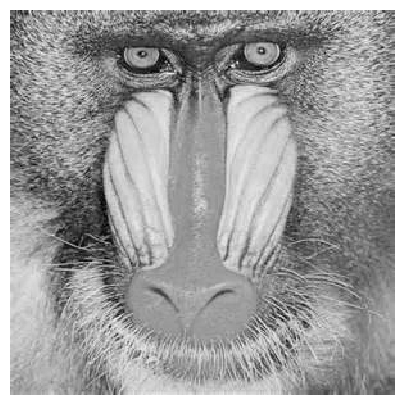

Ci-dessous, le canal a* dans la décomposition L*a*b* de l'image n°1


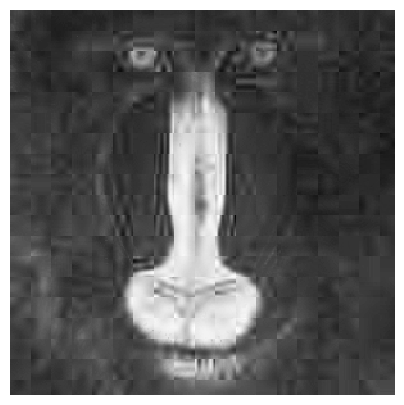

Ci-dessous, le canal b* dans la décomposition L*a*b* de l'image n°1


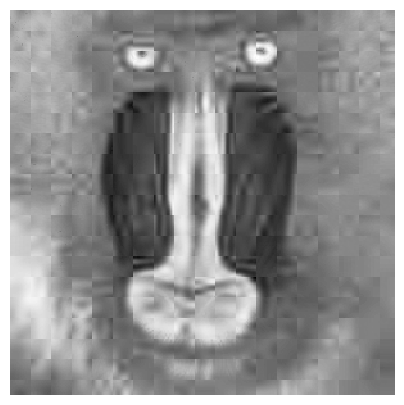

In [266]:
image_l = lab_decomposition(image1, 'L')
image_a = lab_decomposition(image1, 'A')
image_b = lab_decomposition(image1, 'B')

print("Ci-dessous, le canal L* dans la décomposition L*a*b* de l'image n°1")
display(image_l)

print("Ci-dessous, le canal a* dans la décomposition L*a*b* de l'image n°1")
display(image_a)

print("Ci-dessous, le canal b* dans la décomposition L*a*b* de l'image n°1")
display(image_b)

### Question 3.6
Implémentez la méthode `hsv_decomposition()` pour décomposer une image en ces trois canaux H, S, V, puis retournez le canal spécifié ([plus d'info](https://fr.wikipedia.org/wiki/Teinte_Saturation_Valeur)).

Ci-dessous, le canal H dans la décomposition HSV de l'image n°1


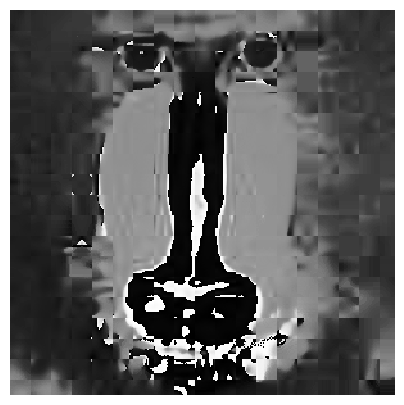

Ci-dessous, le canal S dans la décomposition HSV de l'image n°1


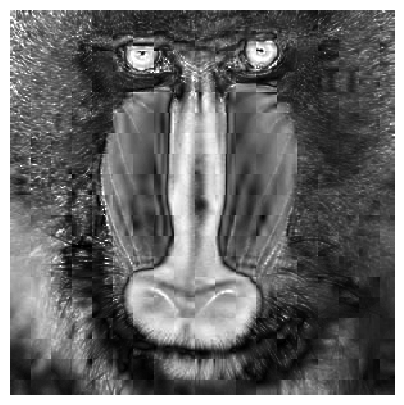

Ci-dessous, le canal V dans la décomposition HSV de l'image n°1


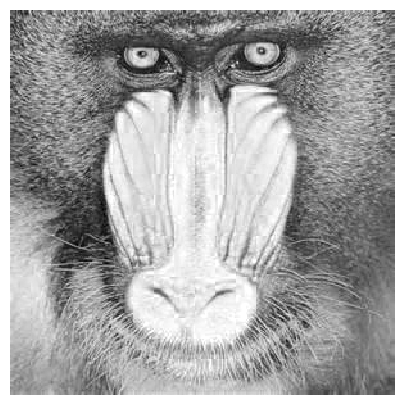

In [267]:
image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')

print("Ci-dessous, le canal H dans la décomposition HSV de l'image n°1")
display(image_h)

print("Ci-dessous, le canal S dans la décomposition HSV de l'image n°1")
display(image_s)

print("Ci-dessous, le canal V dans la décomposition HSV de l'image n°1")
display(image_v)

### Question 3.7
Dans la méthode `mix_images()`, créez une nouvelle image constituée de la moitié gauche de l'image n°1 et la moitié droite de l'image n°2. Pour chaque image en entrée, vous devez exclure le canal spécifié.

Une implémentation correcte devrait afficher la moitié gauche du Mandrill sans le canal rouge et la moitié droite de l'image des maisons sans le canal vert.

[[[0.         0.32156864 0.09019608]
  [0.         0.28235295 0.06666667]
  [0.         0.32941177 0.12941177]
  ...
  [0.         0.44313726 0.3137255 ]
  [0.         0.43137255 0.3019608 ]
  [0.         0.39215687 0.25490198]]

 [[0.         0.32156864 0.09019608]
  [0.         0.34117648 0.11764706]
  [0.         0.3647059  0.15686275]
  ...
  [0.         0.43137255 0.3019608 ]
  [0.         0.43137255 0.29411766]
  [0.         0.45490196 0.31764707]]

 [[0.         0.3764706  0.14509805]
  [0.         0.3647059  0.14117648]
  [0.         0.3019608  0.09411765]
  ...
  [0.         0.3647059  0.21960784]
  [0.         0.28235295 0.13725491]
  [0.         0.32156864 0.17254902]]

 ...

 [[0.         0.58431375 0.57254905]
  [0.         0.61960787 0.6117647 ]
  [0.         0.5882353  0.5882353 ]
  ...
  [0.         0.36862746 0.33333334]
  [0.         0.38039216 0.34509805]
  [0.         0.38039216 0.34509805]]

 [[0.         0.60784316 0.59607846]
  [0.         0.6392157  0.627451  ]


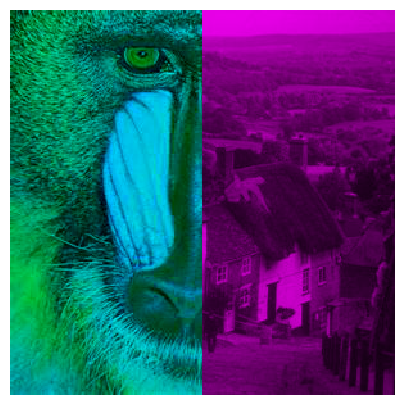

76421.99

In [268]:
image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)

#Test de vérification : la somme des pixels de l'image doit être ~76417.51
np.sum(image_mixed)

### Question 3.8

Implémentez la fonction `mix_quadrants()` dans `imageManip.py`.
Cette fonction prend une image et effectue une opération différente sur chacun des quatre quadrants de l'image. Ensuite, elle combine les quatre quadrants ensemble.

Voici les quatre opérations que vous devez effectuer sur les 4 quadrants :
- Quadrant supérieur gauche : supprimez le canal "R" à l'aide de `rgb_exclusion()`.
- Quadrant supérieur droit : atténuez le quadrant à l'aide de `dim_image()`.
- Quadrant inférieur gauche : éclaircissez le quadrant à l'aide de la fonction  $x_n = x_p^{0.5}$
- Quadrant inférieur droit : supprimez le canal "R" à l'aide de `rgb_exclusion()`.

[[[0.         0.32156864 0.09019608]
  [0.         0.28235295 0.06666667]
  [0.         0.32941177 0.12941177]
  ...
  [0.         0.44313726 0.3137255 ]
  [0.         0.43137255 0.3019608 ]
  [0.         0.39215687 0.25490198]]

 [[0.         0.32156864 0.09019608]
  [0.         0.34117648 0.11764706]
  [0.         0.3647059  0.15686275]
  ...
  [0.         0.43137255 0.3019608 ]
  [0.         0.43137255 0.29411766]
  [0.         0.45490196 0.31764707]]

 [[0.         0.3764706  0.14509805]
  [0.         0.3647059  0.14117648]
  [0.         0.3019608  0.09411765]
  ...
  [0.         0.3647059  0.21960784]
  [0.         0.28235295 0.13725491]
  [0.         0.32156864 0.17254902]]

 ...

 [[0.         0.58431375 0.57254905]
  [0.         0.61960787 0.6117647 ]
  [0.         0.5882353  0.5882353 ]
  ...
  [0.         0.36862746 0.33333334]
  [0.         0.38039216 0.34509805]
  [0.         0.38039216 0.34509805]]

 [[0.         0.60784316 0.59607846]
  [0.         0.6392157  0.627451  ]


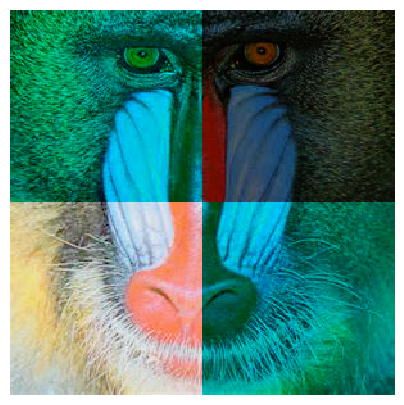

In [269]:
mixed_quadrants = mix_quadrants(image1)
display(mixed_quadrants)

## 4. Livrables

### 4.1. Le code (à remettre sur [benhadid.ddns.net](https://benhadid.ddns.net/course/M1_VPO/hw0))

Le fichier "devoir1.zip" contenant les fichiers **`linalg.py`** et **`imageManip.py`** modifiés dans les zones indiquées par `### VOTRE CODE ICI - DEBUT` et `### VOTRE CODE ICI - FIN`.

**Le code sera remis <del>en classe pendant votre séance de TP</del> au serveur INGInious - <span style='color:Red'> aucun document ou code ne sera accepté si envoyé par mail ou clé USB</span>**.

In [270]:
# Exécutez cette cellule puis récupérez votre fichier "devoir1.zip" depuis le panneau gauche dans Colab
# Si nécessaire, faites un 'refresh' sur le répertoire pour faire apparaître le fichier 'devoir1.zip'

# !zip -r ./devoir1.zip linalg.py imageManip.py   #This command didn't work
# import zipfile
# import os
# 
# def zip_files(zip_filename, files_to_zip):
#     with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#         for file in files_to_zip:
#             zipf.write(file, os.path.basename(file))
# 
# zip_files('./devoir1.zip', ['linalg.py', 'imageManip.py'])